## Frame Analysis Example

In [1]:
import numpy as np
from a2 import direct_stiffness_method as dsm

# Define nodes and elements
nodes = np.array([[0, 0, 0], [-5, 1, 10],[-1,5,13],[-3,7,11],[6,9,5]])
elements = np.array([[0, 1],[1,2],[2,3],[2,4]])

# Define subdomains and material properties
r=1
E=500
nu=0.3
A=np.pi*r**2
Iy=Iz=np.pi*r**4/4
Ip=J=np.pi*r**4/2
subdomain_dict = {1:[E,nu,A,Iz,Iy,Ip,J]}
subdomain_elements = {1:[0,1,2,3]}

# Define supports and loads
supports = {0: (None, None, 0, None, None, None), # Fixed support at node 0
            3: (0, 0, 0, 0, 0, 0),
            4: (0,0,0,None,None,None)}  # Pinned support at node 0
loads = {1:[0.1,-0.05,-0.075,0,0,0],
         2:[0,0,0,0.5,-0.1,0.3]}  # Load at node 1

# Initialize classes
mesh = dsm.Mesh(nodes, elements)
materials = dsm.MaterialParams(subdomain_dict)
for subdomain_id, elements_in_sub in subdomain_elements.items():
    materials.assign_subdomain(subdomain_id, elements_in_sub)

bcs = dsm.BoundaryConditions(supports)
bcs.add_load(loads)

# Solve the system
solver = dsm.Solver(mesh, materials, bcs)
displacements, reactions = solver.generate_mesh_and_solve()

node 0 disp: [u:0.16297, v:0.06754, w:0.0, theta_x:0.00386, theta_y:-0.00978, theta_z:0.00998]
node 0 rxn: [Fx:0.0, Fy:0.0, Fz:0.00667, Mx:0.0, My:0.0, Mz:0.0]
------------------------------------------------------------------
node 1 disp: [u:0.05684, v:-0.02127, w:-0.04423, theta_x:0.00396, theta_y:-0.0093, theta_z:0.00998]
node 1 rxn: [Fx:0.0, Fy:0.0, Fz:0.0, Mx:0.0, My:0.0, Mz:0.0]
------------------------------------------------------------------
node 2 disp: [u:0.00104, v:0.00109, w:0.00035, theta_x:0.00314, theta_y:-0.00401, theta_z:0.00514]
node 2 rxn: [Fx:0.0, Fy:0.0, Fz:0.0, Mx:0.0, My:0.0, Mz:0.0]
------------------------------------------------------------------
node 3 disp: [u:0.0, v:0.0, w:0.0, theta_x:0.0, theta_y:0.0, theta_z:0.0]
node 3 rxn: [Fx:-0.02351, Fy:0.13795, Fz:0.02532, Mx:-0.41161, My:0.29812, Mz:-0.36144]
------------------------------------------------------------------
node 4 disp: [u:0.0, v:0.0, w:0.0, theta_x:-0.00455, theta_y:0.00049, theta_z:0.00066]
no

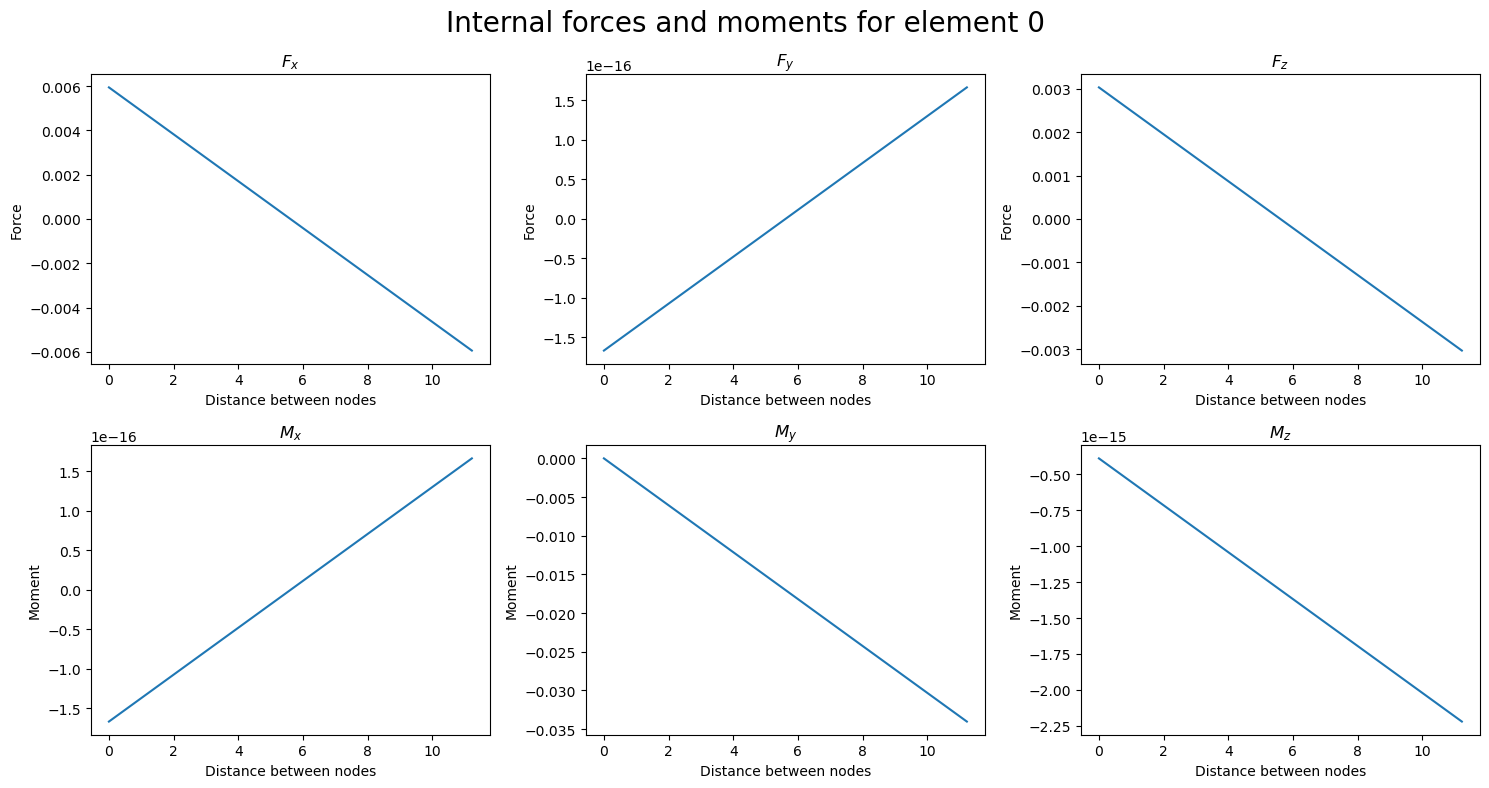

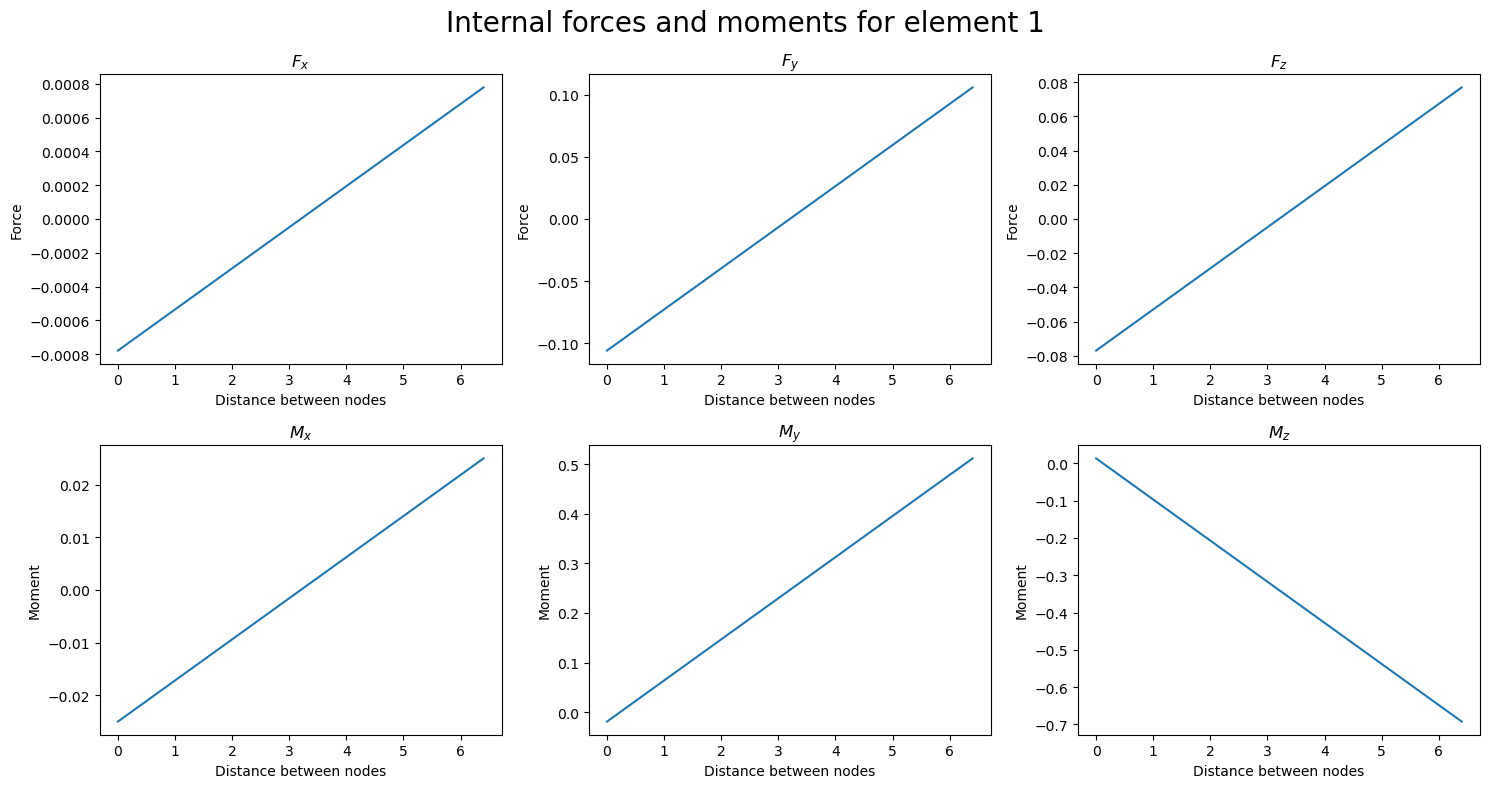

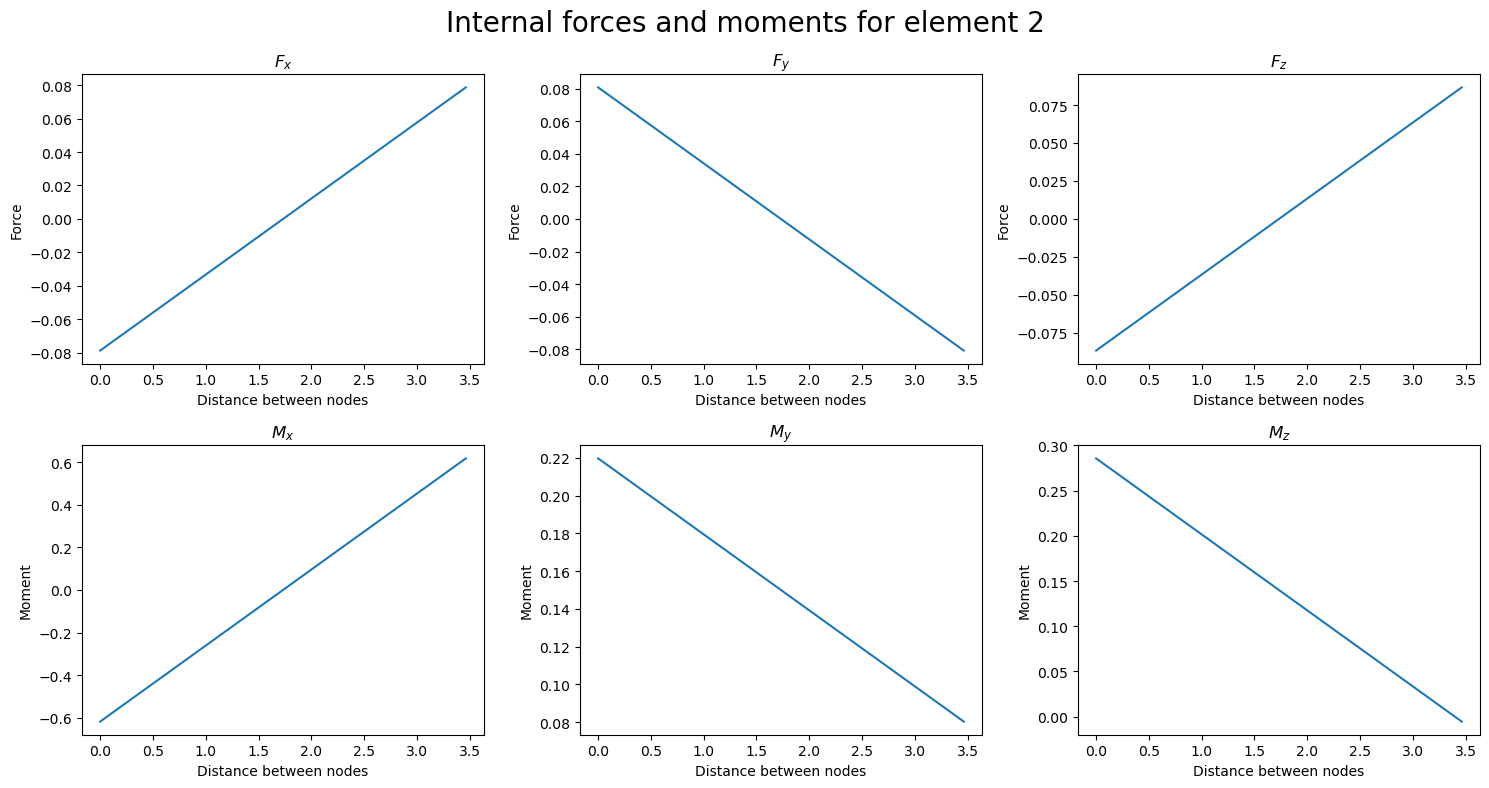

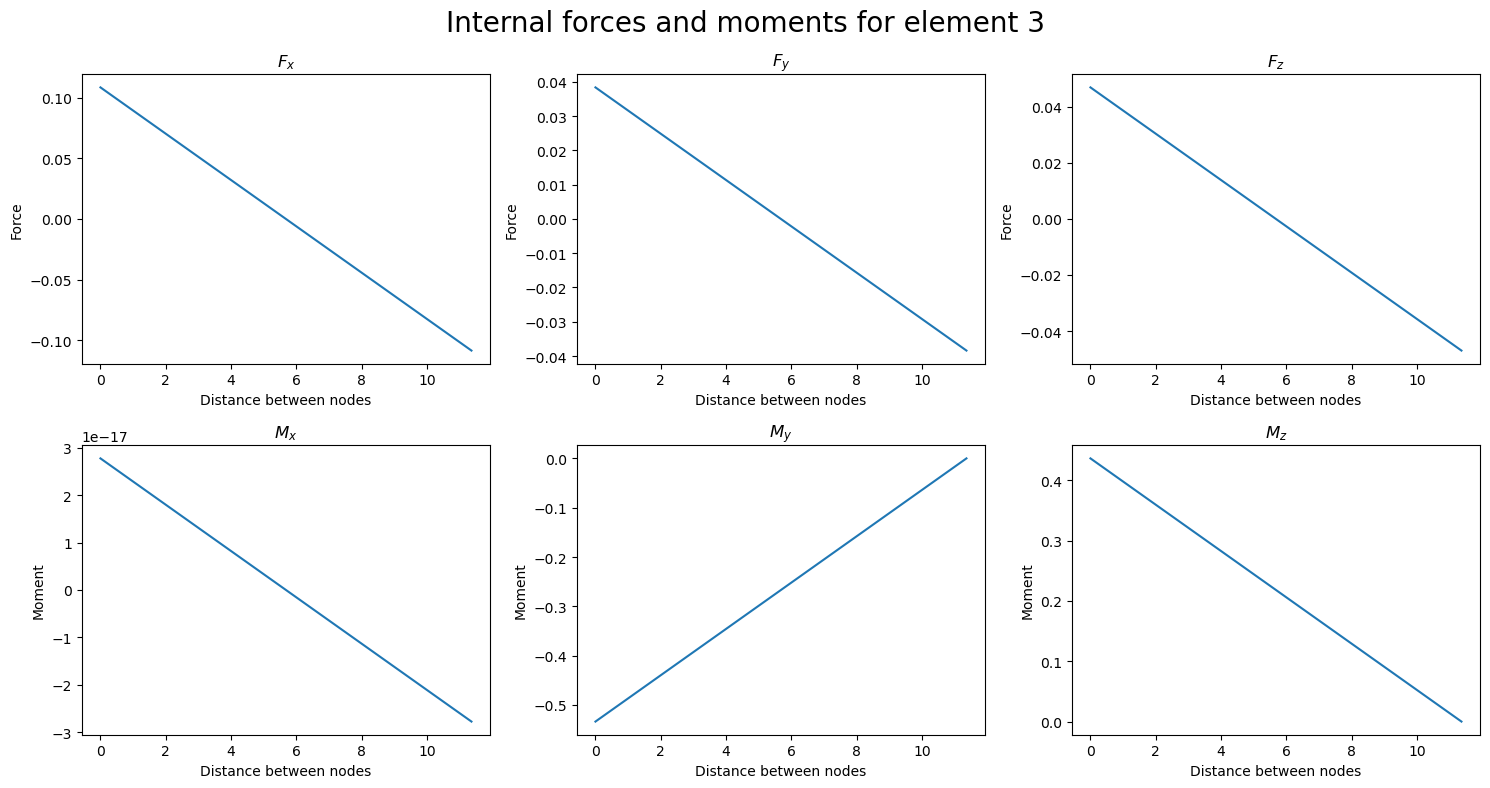

In [2]:
int_forces = solver.compute_local_int_forces_and_moments(displacements)
solver.plot_internal_forces(int_forces)

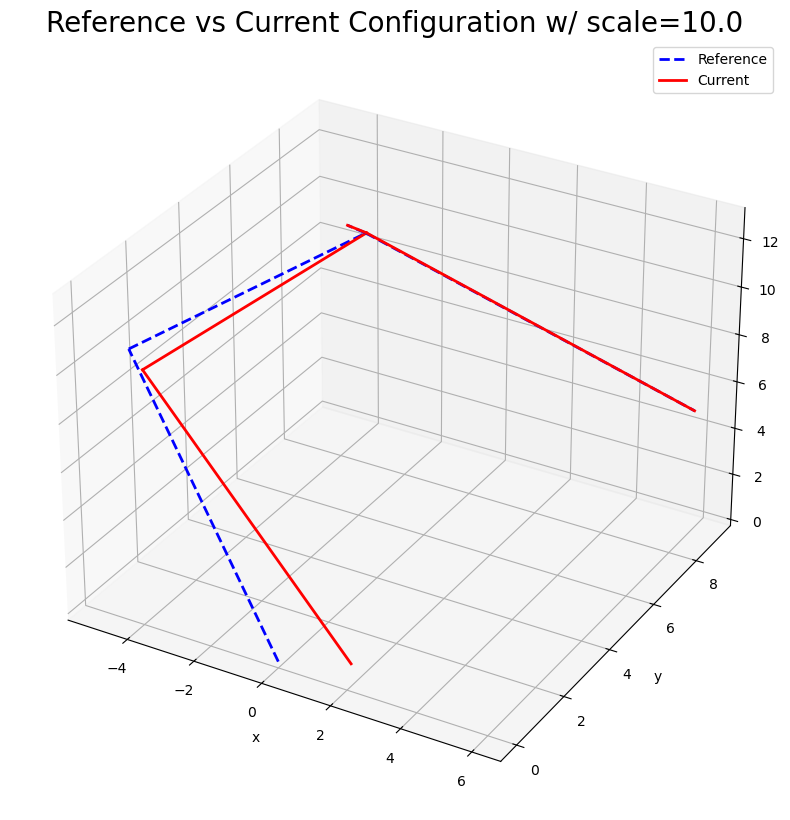

In [3]:
solver.plot_deformed_structure(displacements,scale=10.0)

## Frame Buckling Example

In [1]:
import numpy as np
from a2 import direct_stiffness_method as dsm

# Define nodes and elements
nodes = np.array([[0, 0, 0], [10, 0, 0],[10,20,0],[0,20,0],
                  [0,0,25], [10, 0, 25],[10,20,25],[0,20,25]])
elements = np.array([[0, 4],[1,5],[2,6],[3,7],[4,5],[5,6],[6,7],[4,7]])

# Define subdomains and material properties
E=500
nu=0.3
r=0.5
A=np.pi*r**2
Iy=np.pi*r**4/4
Iz=np.pi*r**4/4
I_rho=np.pi*r**4/2
J=np.pi*r**4/2
subdomain_dict = {1:[E,nu,A,Iz,Iy,I_rho,J]}
subdomain_elements = {1:[0,1,2,3,4,5,6,7]}

# Define supports and loads
supports = {0: (0, 0, 0, 0, 0, 0),
            1: (0, 0, 0, 0, 0, 0),
            2: (0, 0, 0, 0, 0, 0),
            3: (0, 0, 0, 0, 0, 0)}
P=1
loads = {4:[0,0,-P,0,0,0],
         5:[0,0,-P,0,0,0],
         6:[0,0,-P,0,0,0],
         7:[0,0,-P,0,0,0]}  # Load at node 1

# Initialize classes
mesh = dsm.Mesh(nodes, elements)
materials = dsm.MaterialParams(subdomain_dict)
for subdomain_id, elements_in_sub in subdomain_elements.items():
    materials.assign_subdomain(subdomain_id, elements_in_sub)

bcs = dsm.BoundaryConditions(supports)
bcs.add_load(loads)

# Solve the system
solver = dsm.Solver(mesh, materials, bcs)
# displacements, reactions = solver.generate_mesh_and_solve()
eigvals,eigvecs=solver.solve_critical_buckling_load()
print(f'Critical load factor = {eigvals[0]}')

Critical load factor = 0.3072145243027138


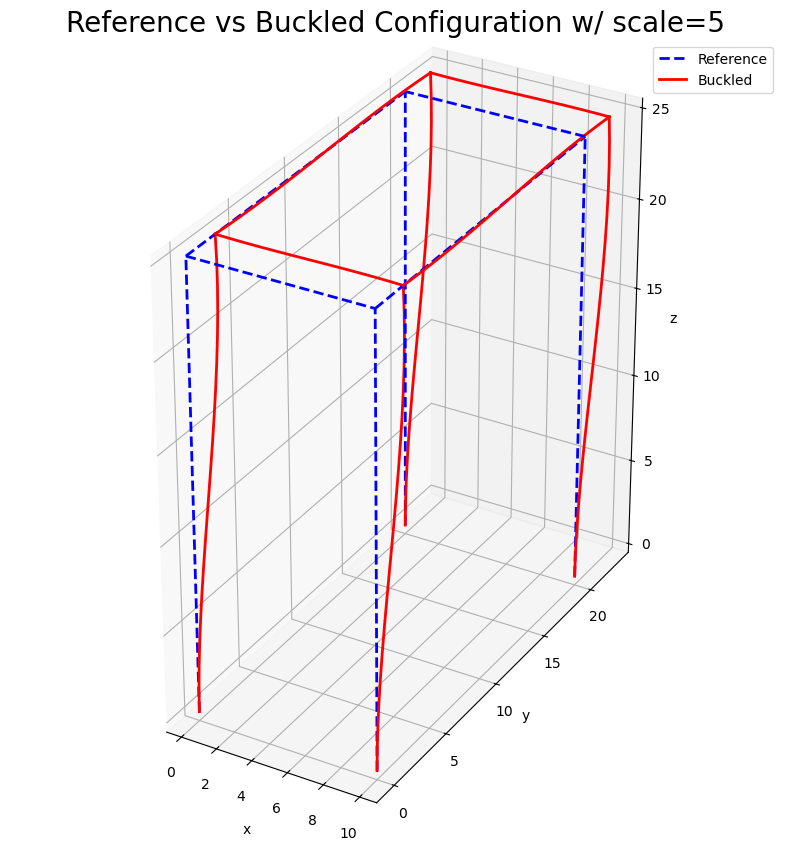

In [2]:
solver.plot_buckled_structure(eigvecs[:,0],scale=5,axis_equal=True)

## Template for Frame Analysis

In [ ]:
import numpy as np
from a2 import direct_stiffness_method as dsm

# nodes = np.array([[x1,y1,z1],[x2,y2,z2]])
nodes = np.array([[0, 0, 10], [15, 0, 10],[15,0,0]])

# elements = np.array([[node1,node2],[node2,node3]])
elements = np.array([[0, 1],[1,2]])

# Define subdomains and material properties
E=
nu=
A=
Iz=
Iy=
Ip=
J=
E0_local_z=
E1_local_z=
# subdomain_dict = {subdomain_id:[E,nu,A,I_z,I_y,I_p,J,local_z_axis]}
subdomain_dict = {1:[E,nu,A,Iz,Iy,Ip,J,E0_local_z],
                  2:[E,nu,A,Iz,Iy,Ip,J,E1_local_z]}

# subdomain_elements = {subdomain_id:[node_ids]}
subdomain_elements = {1:[0],2:[1]}

# supports = {node_id:[u_x,u_y,u_x,theta_x,theta_y,theta_z]}
supports = {0: (0, 0, 0, 0, 0, 0),
            2: (0, 0, 0, None, None, None)}

# loads = {node_id:[F_x,F_y,F_z,M_x,M_y,M_z]}
loads = {1:[0.1,0.05,-0.07,0.05,-0.1,0.25]}  # Load at node 1

# Initialize classes
mesh = dsm.Mesh(nodes, elements)
materials = dsm.MaterialParams(subdomain_dict)
for subdomain_id, elements_in_sub in subdomain_elements.items():
    materials.assign_subdomain(subdomain_id, elements_in_sub)

bcs = dsm.BoundaryConditions(supports)
bcs.add_load(loads)

# Solve the system
solver = dsm.Solver(mesh, materials, bcs)
displacements, reactions = solver.generate_mesh_and_solve()

In [ ]:
int_forces = solver.compute_local_int_forces_and_moments(displacements)
solver.plot_internal_forces(int_forces)

In [ ]:
solver.plot_deformed_structure(displacements,scale=1.0)

## Template for Elastic Critical Load Analysis

In [ ]:
import numpy as np
from a2 import direct_stiffness_method as dsm

# nodes = np.array([[x1,y1,z1],[x2,y2,z2]])
nodes = np.array([[0, 0, 0], [10, 0, 0],[10,20,0],[0,20,0],
                  [0,0,25], [10, 0, 25],[10,20,25],[0,20,25]])
elements = np.array([[0, 4],[1,5],[2,6],[3,7],[4,5],[5,6],[6,7],[4,7]])

# Define subdomains and material properties
E=500
nu=0.3
r=0.5
A=np.pi*r**2
Iy=np.pi*r**4/4
Iz=np.pi*r**4/4
I_rho=np.pi*r**4/2
J=np.pi*r**4/2
local_z_axis=[0,0,1]
# subdomain_dict = {subdomain_id:[E,nu,A,I_z,I_y,I_p,J,local_z_axis]}
subdomain_dict = {1:[E,nu,A,Iz,Iy,I_rho,J,local_z_axis],
                  2:[E,nu,A,Iz,Iy,I_rho,J,None]}

# subdomain_elements = {subdomain_id:[node_ids]}
subdomain_elements = {1:[0,1,2,3,4,5,6,7]}

# supports = {node_id:[u_x,u_y,u_x,theta_x,theta_y,theta_z]}
supports = {0: (0, 0, 0, 0, 0, 0),
            2: (0, 0, 0, None, None, None)}

P=1
loads = {4:[0,0,-P,0,0,0],
         5:[0,0,-P,0,0,0],
         6:[0,0,-P,0,0,0],
         7:[0,0,-P,0,0,0]}  # Load at node 1

# Initialize classes
mesh = dsm.Mesh(nodes, elements)
materials = dsm.MaterialParams(subdomain_dict)
for subdomain_id, elements_in_sub in subdomain_elements.items():
    materials.assign_subdomain(subdomain_id, elements_in_sub)

bcs = dsm.BoundaryConditions(supports)
bcs.add_load(loads)

# Solve the system
solver = dsm.Solver(mesh, materials, bcs)
# displacements, reactions = solver.generate_mesh_and_solve()
eigvals,eigvecs=solver.solve_critical_buckling_load()
print(f'Critical load factor = {eigvals[0]}')

In [ ]:
solver.plot_buckled_structure(eigvecs[:,0],scale=5,axis_equal=True)